# Dissertation - Study 1: Classical Application of NLP on Beige Books


By Charlie Smith, University of South Alabama

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read in bbNoText.csv as bbSimple
bbSimple = pd.read_csv("bbNoText.csv")


In [4]:
# Check balance in bbSimple based on econ_index_change_dummy
print(bbSimple['econ_index_change_dummy'].value_counts())

econ_index_change_dummy
1    3640
0     674
Name: count, dtype: int64


In [5]:
bbSimple.head()

,file_name,Date,Year,District,econ_index,econ_index_change,econ_index_change_dummy,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram
0,1979_bo (6).txt,1979-05-01,1979,1,49.257079,NaN,0,0.8284,0.105670,0.0000,0.427700,0.0000
1,1979_bo (5).txt,1979-06-01,1979,1,49.491718,0.476355,1,-0.3189,-0.003252,0.0000,0.520375,0.0000
2,1979_bo (4).txt,1979-07-01,1979,1,49.581876,0.182166,1,-0.9199,-0.031011,0.0000,0.879575,0.0000
3,1979_bo (3).txt,1979-09-01,1979,1,49.886119,0.613618,1,-0.9602,-0.024409,0.0258,0.875700,-0.0397
4,1979_bo (2).txt,1979-10-01,1979,1,49.981536,0.191269,1,0.9886,0.106649,0.0000,0.603950,0.0000


In [7]:
# Get dataset of just district 1
bbSimple1 = bbSimple[bbSimple['District'] == 1]
bbSimple1.head()

,file_name,Date,Year,District,econ_index,econ_index_change,econ_index_change_dummy,compound_score,mean_sentiment,median_sentiment,IQR_sentiment,sentiment_trigram
0,1979_bo (6).txt,1979-05-01,1979,1,49.257079,NaN,0,0.8284,0.105670,0.0000,0.427700,0.0000
1,1979_bo (5).txt,1979-06-01,1979,1,49.491718,0.476355,1,-0.3189,-0.003252,0.0000,0.520375,0.0000
2,1979_bo (4).txt,1979-07-01,1979,1,49.581876,0.182166,1,-0.9199,-0.031011,0.0000,0.879575,0.0000
3,1979_bo (3).txt,1979-09-01,1979,1,49.886119,0.613618,1,-0.9602,-0.024409,0.0258,0.875700,-0.0397
4,1979_bo (2).txt,1979-10-01,1979,1,49.981536,0.191269,1,0.9886,0.106649,0.0000,0.603950,0.0000


In [9]:
# Do predictive model on just District 1

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Split into testing and training datasets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_set, test_set = train_test_split(bbSimple1, test_size=0.2, random_state=7)

# Divide up X and Y variables in testing and training sets
X_train = train_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_train = train_set['econ_index_change_dummy']
X_test = test_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_test = test_set['econ_index_change_dummy']

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=755)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
#cv_predictions = cross_val_predict(model, X, y, cv=k)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
# rounded to 2 decimal places
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.83
Precision: 0.9
Recall: 0.9
Specificity: 0.45
AUC: 0.68
Confusion Matrix:
[[ 5  6]
 [ 6 55]]


In [10]:
# Use k-fold cross validation to get a better idea of the model's performance
k = 5
cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
cv_predictions = cross_val_predict(model, X_train, y_train, cv=k)

# Calculate additional metrics
cv_accuracy = accuracy_score(y_train, cv_predictions)
cv_precision = precision_score(y_train, cv_predictions)
cv_specificity = recall_score(y_train, cv_predictions, pos_label=0)
cv_recall = recall_score(y_train, cv_predictions)
cv_auc = roc_auc_score(y_train, cv_predictions)
cv_conf_matrix = confusion_matrix(y_train, cv_predictions)

# Print the metrics
# rounded to 2 decimal places
print("Cross-Validation Accuracy:", round(cv_accuracy, 2))
print("Cross-Validation Precision:", round(cv_precision, 2))
print("Cross-Validation Recall:", round(cv_recall, 2))
print("Cross-Validation Specificity:", round(cv_specificity, 2))
print("Cross-Validation AUC:", round(cv_auc, 2))
print("Cross-Validation Confusion Matrix:")
print(cv_conf_matrix)


Cross-Validation Accuracy: 0.79
Cross-Validation Precision: 0.84
Cross-Validation Recall: 0.91
Cross-Validation Specificity: 0.3
Cross-Validation AUC: 0.6
Cross-Validation Confusion Matrix:
[[ 17  40]
 [ 21 208]]


In [4]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Split into testing and training datasets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_set, test_set = train_test_split(bbSimple, test_size=0.2, random_state=7)

# Divide up X and Y variables in testing and training sets
X_train = train_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_train = train_set['econ_index_change_dummy']
X_test = test_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_test = test_set['econ_index_change_dummy']

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=755)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
#cv_predictions = cross_val_predict(model, X, y, cv=k)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
# rounded to 2 decimal places
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.83
Precision: 0.86
Recall: 0.96
Specificity: 0.18
AUC: 0.57
Confusion Matrix:
[[ 25 117]
 [ 31 690]]


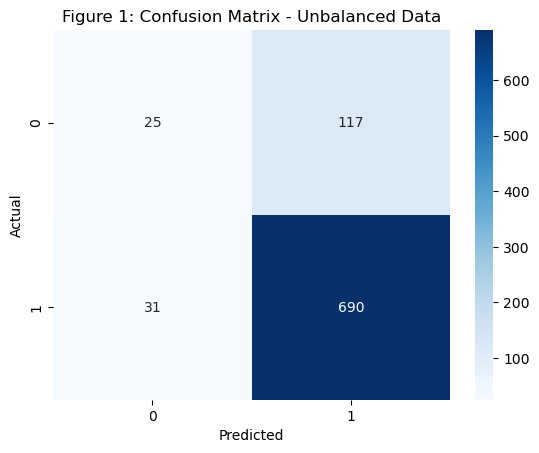

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 1: Confusion Matrix - Unbalanced Data")
#plt.savefig("confusion_matrix_unbalanced.png")
plt.show()


In [6]:
from sklearn.metrics import classification_report  # Use appropriate metrics for your problem

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Note weakness in predicting 0s, which is expected given the class imbalance


Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.18      0.25       142
           1       0.86      0.96      0.90       721

    accuracy                           0.83       863
   macro avg       0.65      0.57      0.58       863
weighted avg       0.79      0.83      0.80       863



In [7]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, r_thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7210740169170362


# Balanced dataset with SMOTE

In [8]:
# Use SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into X and y
X = bbSimple.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y = bbSimple['econ_index_change_dummy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=755)

# Use SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Create a new dataframe with the balanced dataset
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res, columns=['econ_index_change_dummy'])

bbBalanced = pd.concat([X_res, y_res], axis=1)

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=755)

# Fit the model
model.fit(X_res, y_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
# rounded to 2 decimal places
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)


C:\Users\MCOB PHD 14\AppData\Local\Temp\ipykernel_19836\1357468950.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


Accuracy: 0.79
Precision: 0.9
Recall: 0.84
Specificity: 0.48
AUC: 0.66
Confusion Matrix:
[[ 66  71]
 [114 612]]


In [10]:
from sklearn.metrics import classification_report  # Use appropriate metrics for your problem

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Note better performance in predicting 0s after balancing the dataset


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.48      0.42       137
           1       0.90      0.84      0.87       726

    accuracy                           0.79       863
   macro avg       0.63      0.66      0.64       863
weighted avg       0.81      0.79      0.80       863



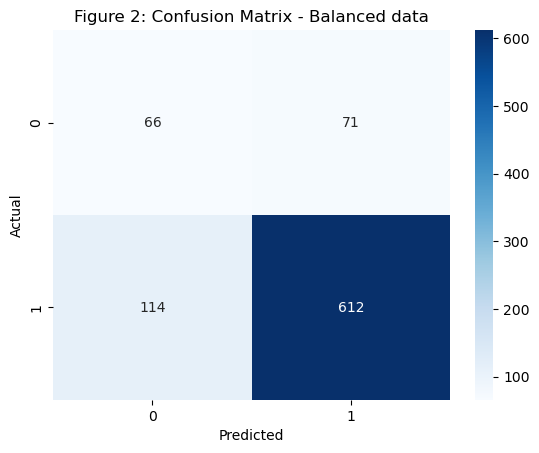

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 2: Confusion Matrix - Balanced data")
#plt.savefig("confusion_matrix_balanced.png")
plt.show()


In [12]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, r_thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7466369065572782


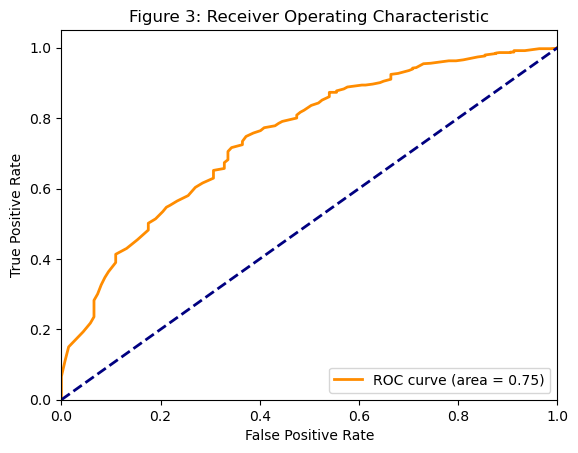

In [13]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 3: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_curve.png")
plt.show()

# Calculate optimal threshold

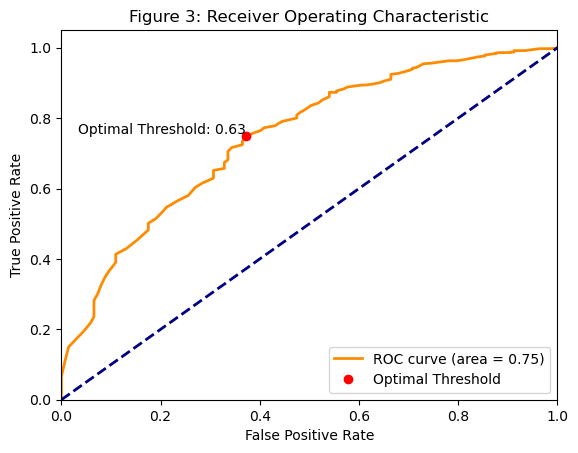

In [21]:
# Calculating Youden's J Statistic
    # J = Sensitivity + Specificity - 1
        # Could be written J = tpr - fpr
        # Because specificity = 1 - fpr
    # Higher values indicate better performance
    # Point on ROC that maximizes is often considered optimal
    # That is, maximizing the sum of sensitivity and specificity

# Calculate the Youden's J statistic
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = r_thresholds[optimal_idx]
optimal_J = J[optimal_idx]

# Plot the optimal point on the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 3: Receiver Operating Characteristic')

# Add the optimal threshold to the plot
plt.text(fpr[optimal_idx], tpr[optimal_idx], 'Optimal Threshold: {:.2f}'.format(optimal_threshold), 
         va='bottom', ha='right', color='black')

plt.legend(loc="lower right")
plt.savefig("ROC_curve_optimal.png")
plt.show()

In [22]:
# Recalcuate the model using the optimal threshold
y_pred_optimal = np.where(y_prob[:, 1] > optimal_threshold, 1, 0)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
specificity = recall_score(y_test, y_pred_optimal, pos_label=0)
recall = recall_score(y_test, y_pred_optimal)
auc = roc_auc_score(y_test, y_pred_optimal)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

# Print the metrics
# rounded to 2 decimal places
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.72
Precision: 0.91
Recall: 0.73
Specificity: 0.64
AUC: 0.68
Confusion Matrix:
[[ 87  50]
 [193 533]]


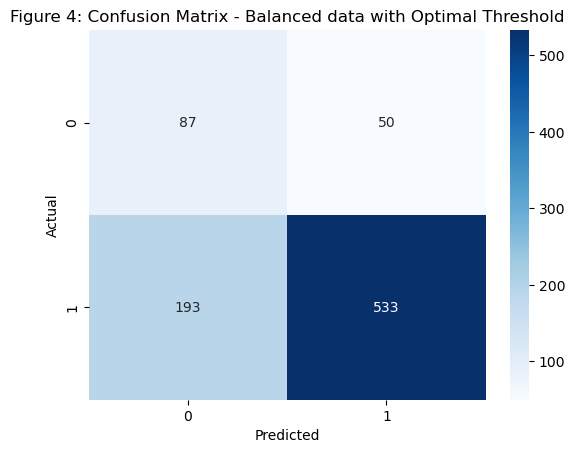

In [23]:
# Confusion matrix using optimal threshold
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Figure 4: Confusion Matrix - Balanced data with Optimal Threshold")
#plt.savefig("confusion_matrix_optimal.png")
plt.show()

# Feature Importance

C:\Users\MCOB PHD 14\AppData\Local\Temp\ipykernel_19836\776626450.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


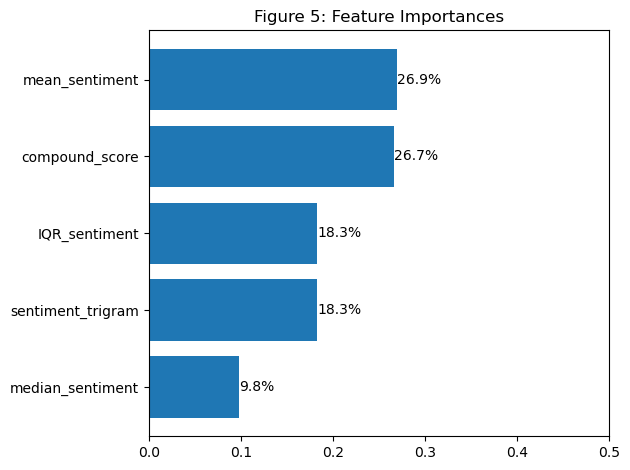

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
model.fit(X_res, y_res)

# Get feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)

# Plot the feature importances
plt.figure()
plt.title("Figure 5: Feature Importances")
bars = plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlim([0, .5])

# Add labels to the bars
for bar, importance in zip(bars, importances[indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.1f}%'.format(importance*100), 
             va='center', ha='left', color='black')

plt.tight_layout()  # Adjust layout to prevent cutting off
plt.savefig("Feature_importances_balanced.png", bbox_inches='tight')


plt.show()
